In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [24]:
df=pd.read_csv(r"C:\Users\LENOVO\Desktop\heart_failure_clinical_records_dataset.csv")

In [25]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [26]:
df.shape

(299, 13)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [28]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [30]:
#numerical variables summary statistics
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [31]:
for columns in df.columns:
    print(columns,"=",df[columns].nunique())

age = 47
anaemia = 2
creatinine_phosphokinase = 208
diabetes = 2
ejection_fraction = 17
high_blood_pressure = 2
platelets = 176
serum_creatinine = 40
serum_sodium = 27
sex = 2
smoking = 2
time = 148
DEATH_EVENT = 2


# EDA (Exploratory data analysis)
 Multivariate data analysis(pairplot)

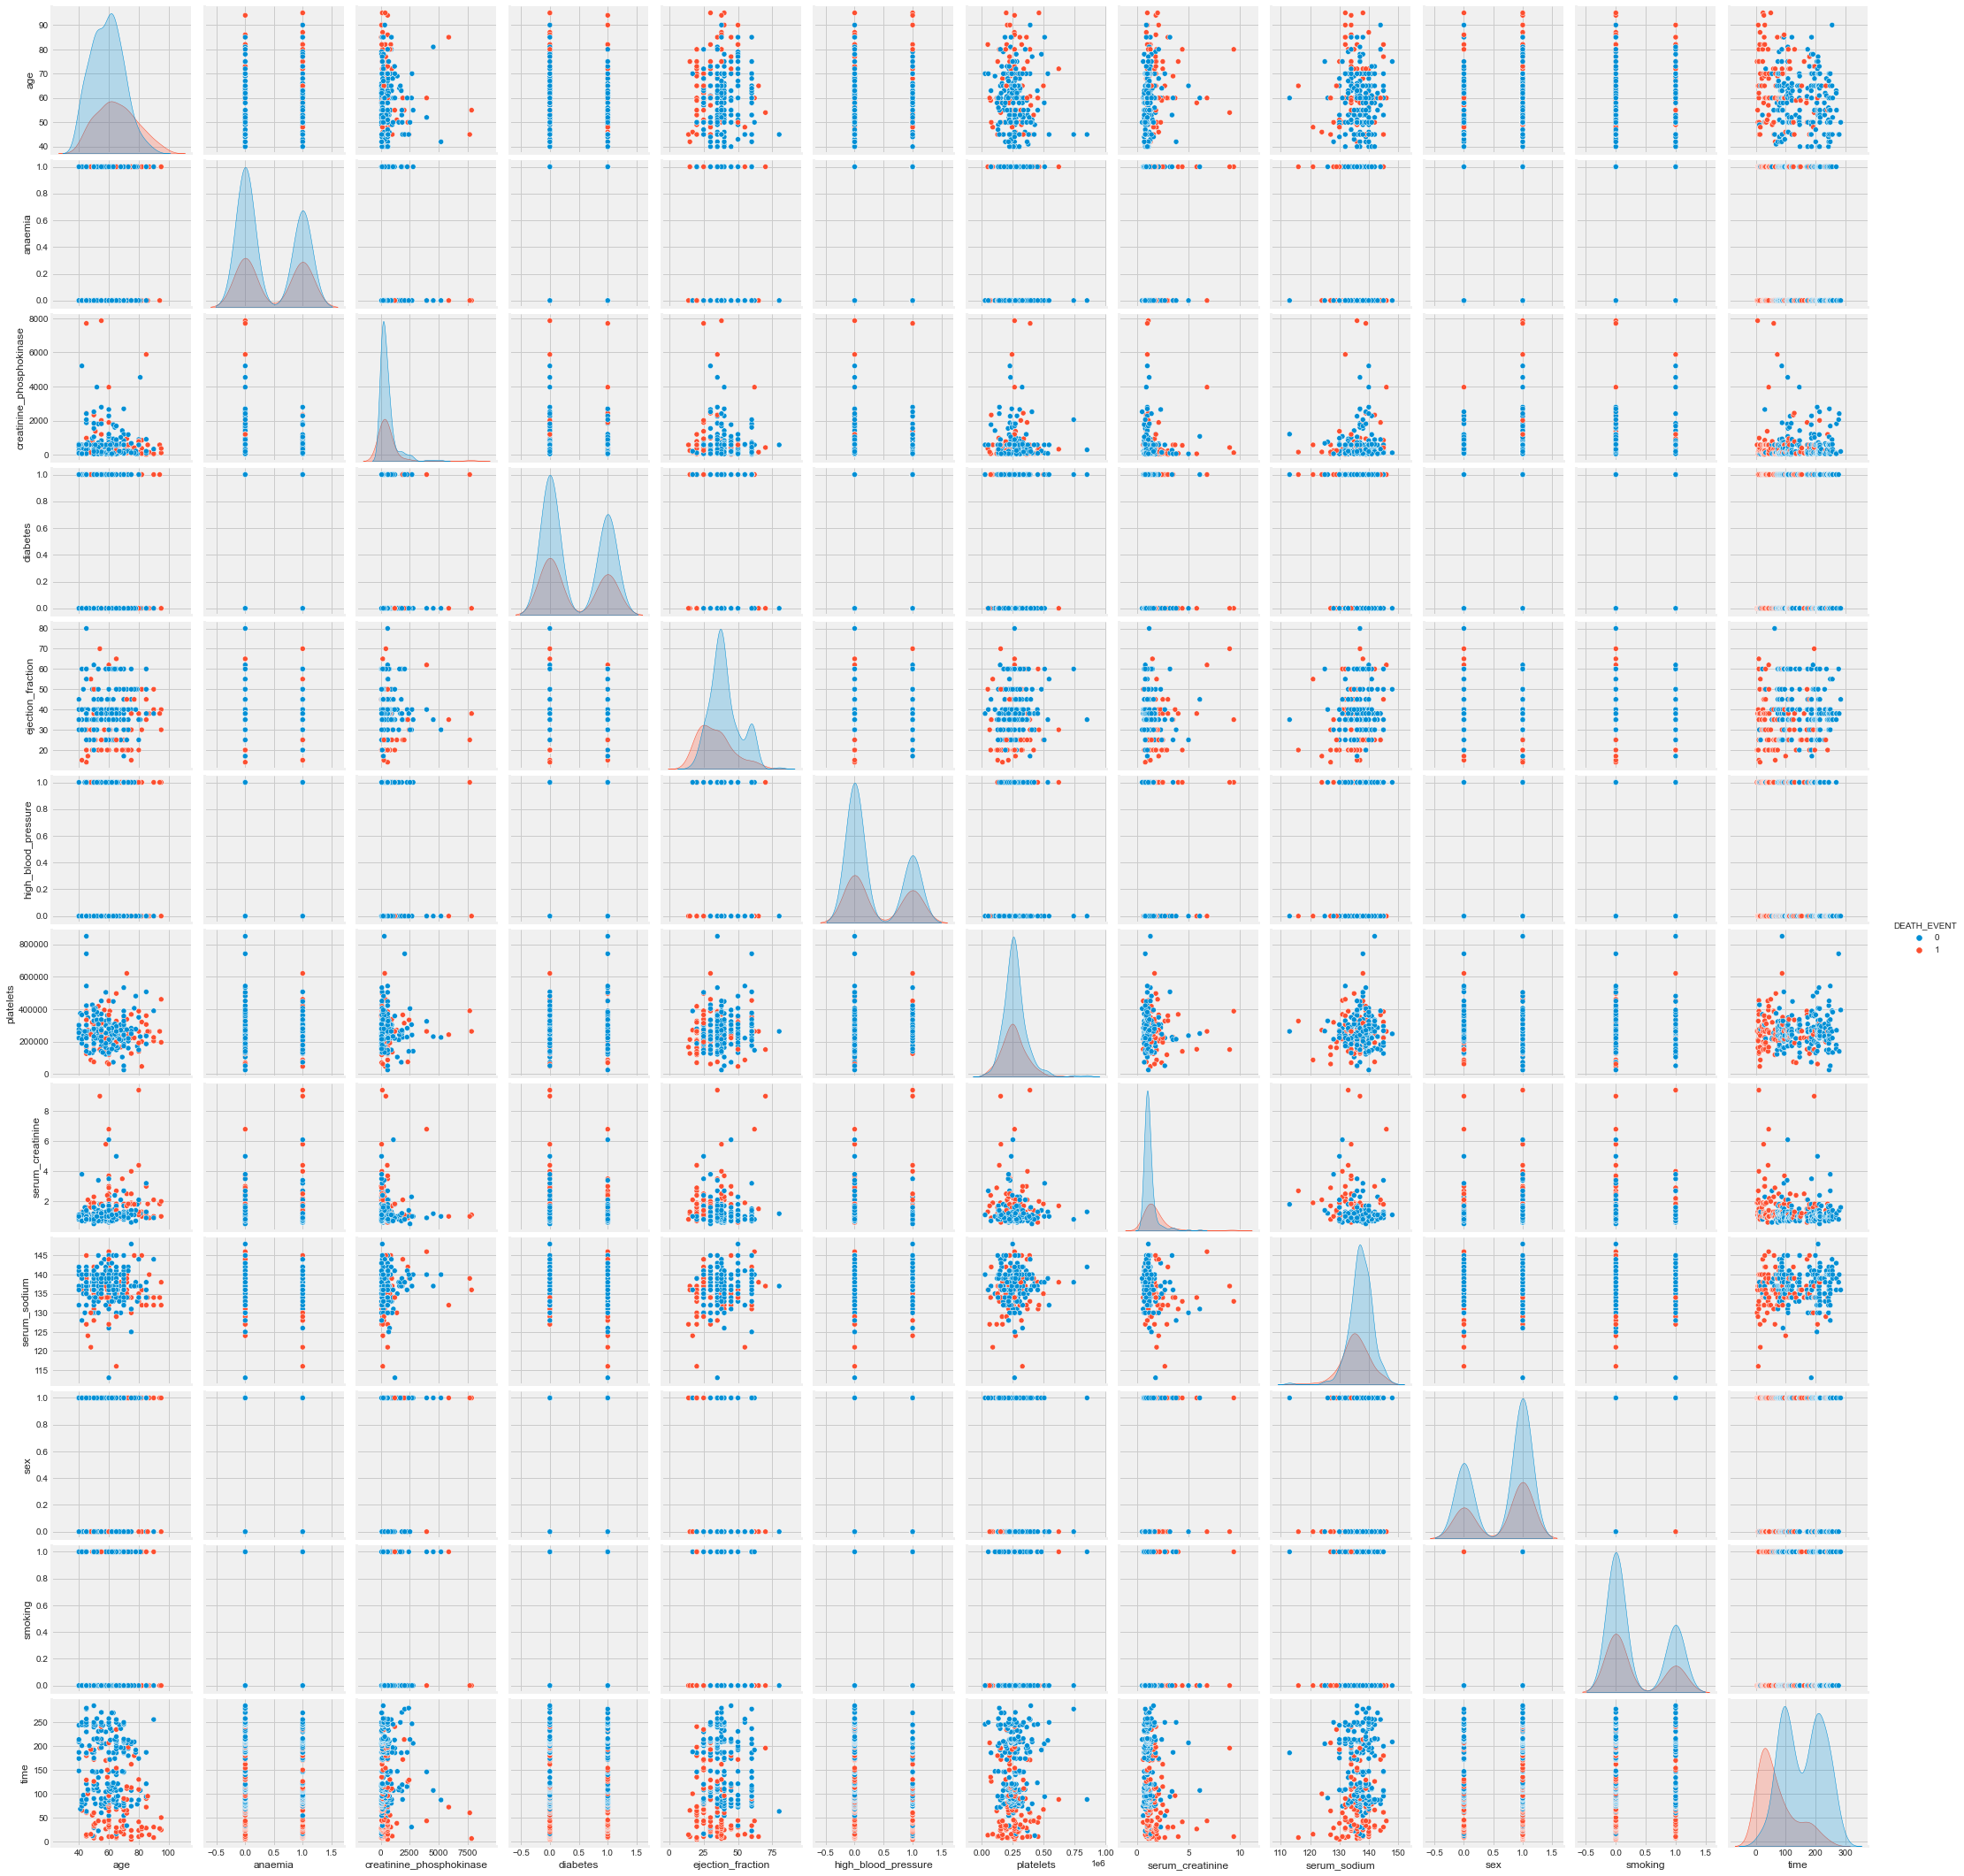

In [33]:
sns.pairplot(df,hue = "DEATH_EVENT")

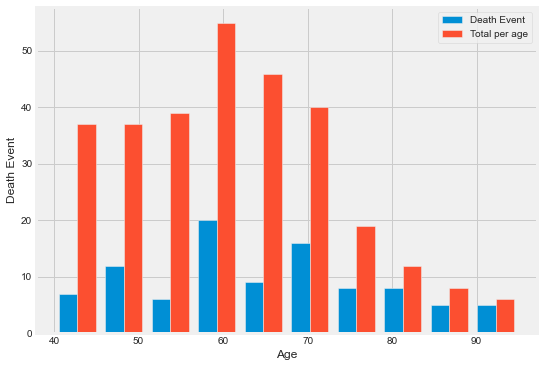

In [56]:
age_yes = df[df['DEATH_EVENT'] == 1].age
age = df.age

plt.figure(figsize=(8,6))
plt.xlabel('Age')
plt.ylabel('Death Event')
plt.hist([age_yes, age], label=['Death Event', 'Total per age'])
plt.legend()

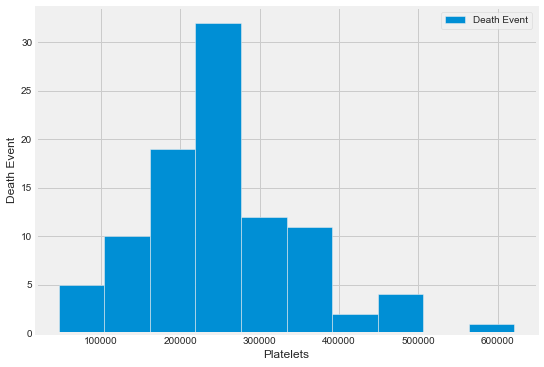

In [57]:
plat = df[df['DEATH_EVENT'] == 1].platelets

plt.figure(figsize=(8,6))
plt.xlabel('Platelets')
plt.ylabel('Death Event')
plt.hist(plat, label=['Death Event'])
plt.legend()

No handles with labels found to put in legend.


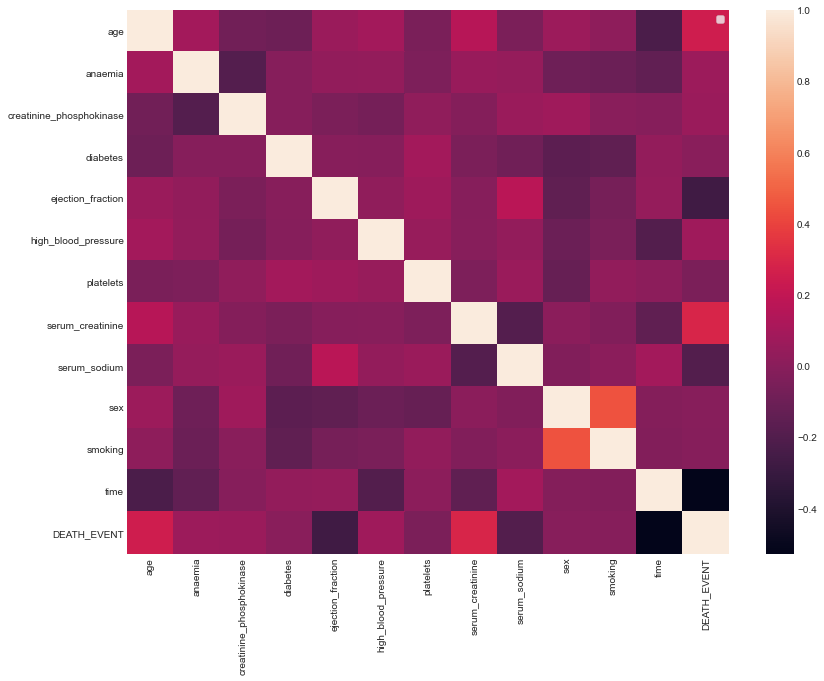

In [58]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())
plt.legend()

In [67]:
X = df.iloc[:,0:20]  #independent columns
y = df.iloc[:,-1]    #target column
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.02244094 0.0032033  0.0086118  0.00365253 0.02426358 0.00315872
 0.00775727 0.01971054 0.01326818 0.00317138 0.00336702 0.09473052
 0.79266423]


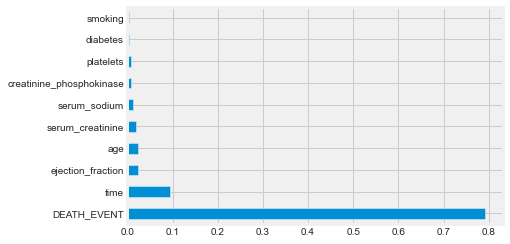

In [68]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [71]:
conditions = ['time','ejection_fraction','serum_creatinine','age']
x = df[conditions]
y = df["DEATH_EVENT"]

In [73]:
# Train Test split
train_x, test_x,train_y,test_y = train_test_split(x,y, test_size=0.2, random_state=2)

# KNN Classifier

In [86]:
#KNN Finding the Best K
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =12)
knnclassifier = KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(x_train,y_train)
y_pred = knnclassifier.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.8533333333333334

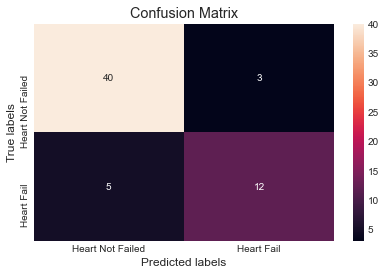

In [84]:
#Printing KNN Accuracy and Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(test_y, prediction)
ac = accuracy_score(test_y, prediction)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Heart Not Failed', 'Heart Fail']); ax.yaxis.set_ticklabels(['Heart Not Failed', 'Heart Fail']);

# Decision Tree Classifier

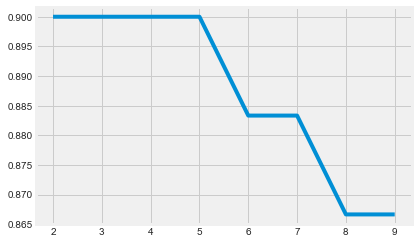

In [88]:
#Finding the Best Max Leaf Node Value
from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,10):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(train_x, train_y)
    y_pred = classifier.predict(test_x)
    list1.append(accuracy_score(test_y,y_pred))
#print(mylist)
plt.plot(list(range(2,10)), list1)
plt.show()

In [89]:
#Decision Tree Classifier
classifier = DecisionTreeClassifier(max_leaf_nodes = 2, random_state=0, criterion='entropy')
classifier.fit(train_x, train_y)
y_pred = classifier.predict(test_x)
#from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(test_y, y_pred)
ac = accuracy_score(test_y, y_pred)
print("Dec Tree Classifier acc without outlier:",ac)
print("Confusion Matrix:",cm)


Dec Tree Classifier acc without outlier: 0.9
Confusion Matrix: [[43  0]
 [ 6 11]]


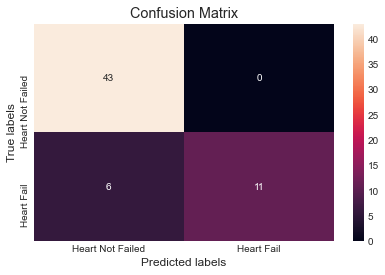

In [90]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Heart Not Failed', 'Heart Fail']); ax.yaxis.set_ticklabels(['Heart Not Failed', 'Heart Fail']);